# Performance Assement Data Cleaning — D206 


## Information
Matthew Blasa 
<br>
Student ID: 001781641
<br>
MS Data Analytics (05/01/2021)
<br>
Program Mentor: Kirk Kelly 
<br>
(503)805-0297
<br>
mblasa@wgu.edu

### Table of Contents

* [Part I: Research Question](#Research_Question)
    * [Section 1A](#section_1_1)
    * [Section 1B](#Section_1_2)
* [Part II: Data-Cleaning Plan](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Part III: Data Cleaning](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Part IV: Data Cleaning](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

# Part I: Research Question <a class="anchor" id="Research_Question"></a>

## A. Question 

Can we determine which individual customers are at high risk of churn? And, can we determine which features are most significant to churn?

## B.  Variables

The data has over 10,000 rows. We will use the churn column, as a dependent variable. Churn contains data on wether or not a customer has continued or discontinued service within the last month

Predictors (independent variables) that may identify a relationship with the churn column are: 
* Services, such a mulitple phone lines.
* Customer account information: payment methods, specific packages, paperless billing, bandiwidth usage.
* Customer Demographic Info: gender, marital status, income. 
* Customer Responses to the survey. The survey was self-report by the customers, rating their service experience. 

The data is both numerical (as in the yearly GB bandwidth usage; customer annual income) and categorical (a "Yes" or "No" for Churn; customer job).

# Part II: Data-Cleaning Plan

## C1 Techniques

My process will be:
<ol>
    <li>Create a file on my computer, and have a repository on GitHub as backup and for version control</li> 
    <li> Convert the CSV into a dataframe using the Pandas python library. </li> 
    <li> Evaluate the data struture to better understand input data.</li> 
    <li> Renaming the variables each time there is a significant change or cleaning. 
    <li> Look for misspellings, missing data, unnamed columns, etc. 
    <li> Find outliers in the data set, and distribution of features. 
    <li>Fill null values with values of central tendency: (mean, median or mode). I wil also remove outliers that are several standard deviations above the mean. 

<ol>

## C2 Approach

There is a large amount of data missing from the data set. For certain columns, such as children, age, and income, approximately 25% of the data is missing. This is about 2500 rows in the data set, non-overlapping. Given the size of the missing data, dropping the nulls would bias the results of the principal component analysis, or any other analytics. To compensate for this, we will be filling in the data, using values of central tendency. Data that is unrelated to our hypothesis will not have their nulls filled. 

## C3 Languages and Packages 

I will use the Python, since I use it at work to perform EDAs and clean data. I'll be using jupyter notebook, since it allows me to use markdowns to answer questions and program at the same time. To save time, I will be using several data science Python libraries to simplify cleaning. The following will be used:

* NumPy - to work with arrays
* Pandas - used to 
* Matplotlib - plotting charts 
* Scikit-learn - for PCA, Machine Learning, and Normaliization. 
* SciPy - used for mathematical tranformations. 
* Seaborn - visulization of more complex graphs
* Missingno - visualization of missing data. 

## C4. Provide the Code:

In [3]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install missingno
!pip install pca

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [5]:
ch_df = pd.read_csv('churn_raw_data.csv')

In [6]:
ch_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [7]:
ch_df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [8]:
ch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [9]:
clean_df = ch_df.drop(ch_df.columns[0], axis = 1)
clean_df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [10]:
clean_df.rename(columns = {'item1':'Responses', 
                    'item2':'Fixes', 
                     'item3':'Replacements', 
                     'item4':'Reliability', 
                     'item5':'Options', 
                     'item6':'Respectfulness', 
                     'item7':'Courteous', 
                     'item8':'Listening'}, 
          inplace=True)

In [11]:
clean_df

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [12]:
clean_df2 = clean_df.drop(columns=['CaseOrder', 'Zip', 'Lat', 'Lng'])

In [13]:
clean_df2 

,Customer_id,Interaction,City,State,County,Population,Area,Timezone,Job,Children,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,NaN,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1.0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0.0,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,640,Rural,America/New_York,Sport and exercise psychologist,3.0,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,77168,Rural,America/Chicago,Consulting civil engineer,4.0,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,406,Rural,America/Chicago,IT technical support officer,NaN,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,35575,Urban,America/New_York,Water engineer,1.0,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [14]:
clean_df2.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [15]:
clean_df2.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

<AxesSubplot:>

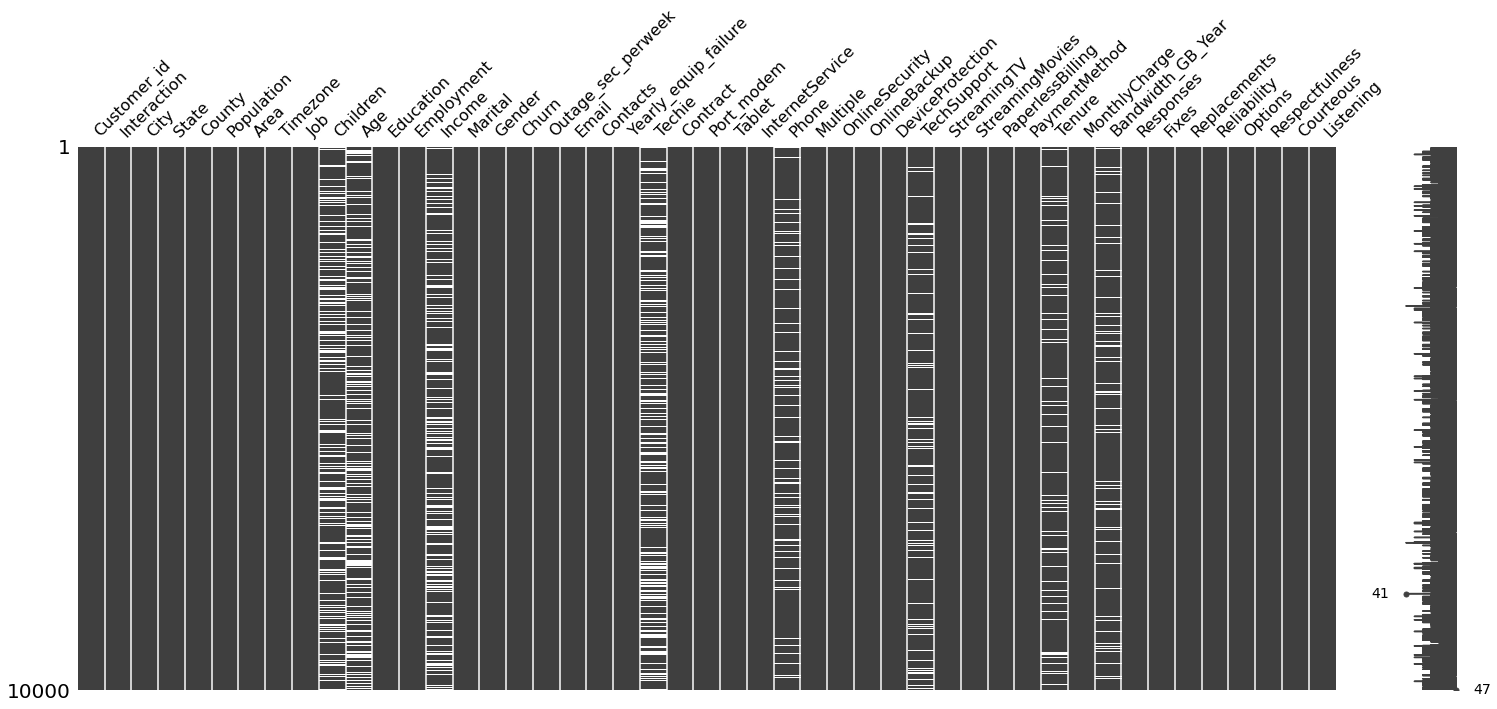

In [16]:
msno.matrix(clean_df2)

There are nulls present in the columns: children, age, income, phone, TechSupport, Tenure, Bandwidth_GB_Year

In [17]:
clean_df2.isnull().sum()

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

In [18]:
clean_df2.isnull().sum()/clean_df2.shape[0]

Customer_id             0.0000
Interaction             0.0000
City                    0.0000
State                   0.0000
County                  0.0000
Population              0.0000
Area                    0.0000
Timezone                0.0000
Job                     0.0000
Children                0.2495
Age                     0.2475
Education               0.0000
Employment              0.0000
Income                  0.2490
Marital                 0.0000
Gender                  0.0000
Churn                   0.0000
Outage_sec_perweek      0.0000
Email                   0.0000
Contacts                0.0000
Yearly_equip_failure    0.0000
Techie                  0.2477
Contract                0.0000
Port_modem              0.0000
Tablet                  0.0000
InternetService         0.0000
Phone                   0.1026
Multiple                0.0000
OnlineSecurity          0.0000
OnlineBackup            0.0000
DeviceProtection        0.0000
TechSupport             0.0991
Streamin

In [19]:
features = ['Employment', 'Area', 'Job', 'Children', 'Age', 'Education', 'Employment', 'Marital', 'Gender', 'Contract', 'PaymentMethod']

In [20]:
for feat in features: 
    print('\n')
    print(feat)
    print('-------------------------')
    print(sorted(clean_df2[feat].unique()))



Employment
-------------------------
['Full Time', 'Part Time', 'Retired', 'Student', 'Unemployed']


Area
-------------------------
['Rural', 'Suburban', 'Urban']


Job
-------------------------
['Academic librarian', 'Accommodation manager', 'Accountant, chartered', 'Accountant, chartered certified', 'Accountant, chartered management', 'Accountant, chartered public finance', 'Accounting technician', 'Actor', 'Actuary', 'Acupuncturist', 'Administrator', 'Administrator, Civil Service', 'Administrator, arts', 'Administrator, charities/voluntary organisations', 'Administrator, education', 'Administrator, local government', 'Administrator, sports', 'Adult guidance worker', 'Adult nurse', 'Advertising account executive', 'Advertising account planner', 'Advertising art director', 'Advertising copywriter', 'Advice worker', 'Aeronautical engineer', 'Agricultural consultant', 'Agricultural engineer', 'Aid worker', 'Air broker', 'Air cabin crew', 'Air traffic controller', 'Airline pilot', 'Am

In [21]:
clean_df2.loc[clean_df2.duplicated()]

,Customer_id,Interaction,City,State,County,Population,Area,Timezone,Job,Children,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening


In [22]:
clean_df2.std()


Population              14432.698671
Children                    2.154758
Age                        20.753928
Income                  28358.469482
Outage_sec_perweek          7.025921
Email                       3.025898
Contacts                    0.988466
Yearly_equip_failure        0.635953
Tenure                     26.438904
MonthlyCharge              43.335473
Bandwidth_GB_Year        2187.396807
Responses                   1.037797
Fixes                       1.034641
Replacements                1.027977
Reliability                 1.025816
Options                     1.024819
Respectfulness              1.033586
Courteous                   1.028502
Listening                   1.028633
dtype: float64

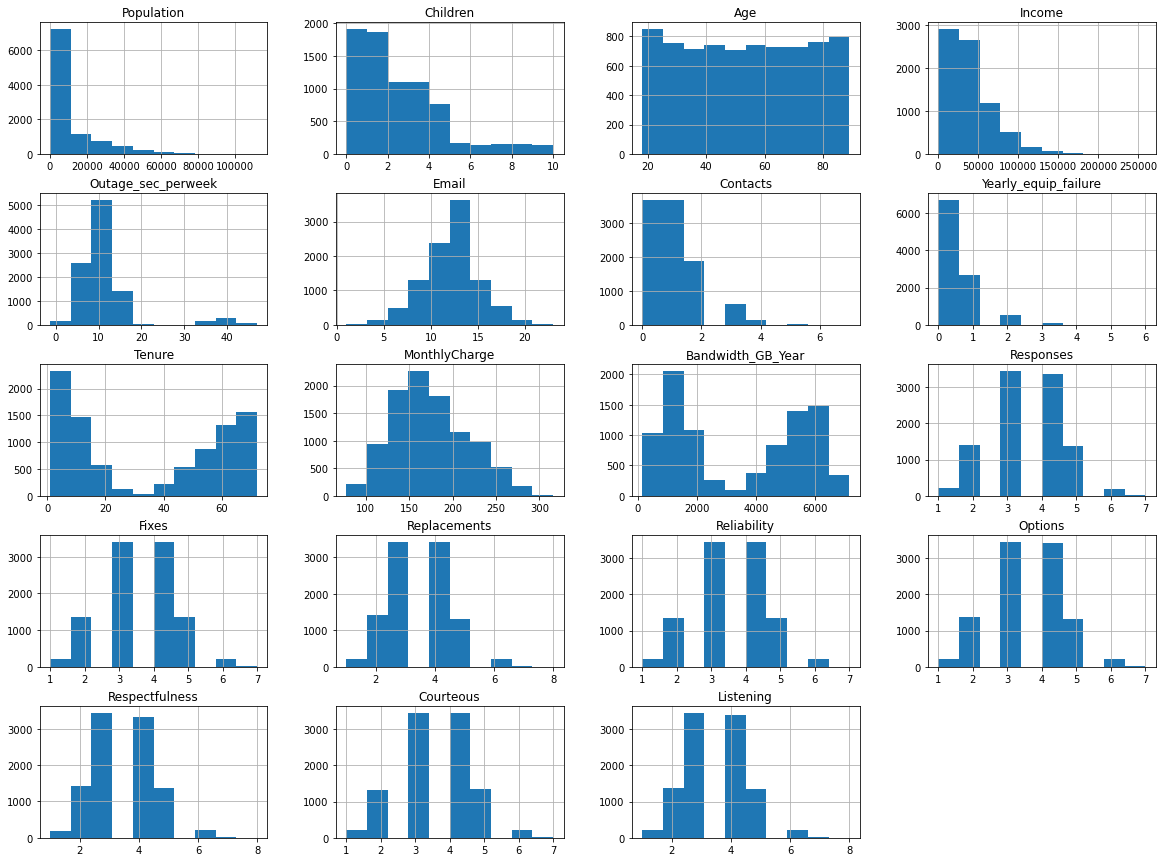

In [23]:
clean_df2.hist(figsize=(20, 15))
plt.show()

In [24]:
clean_df3 = clean_df2.copy()

In [25]:
clean_df3['Children'] = clean_df2['Children'].fillna(clean_df2['Children'].median())
clean_df3['Age'] = clean_df2['Age'].fillna(clean_df2['Age'].median())
clean_df3['Income'] = clean_df2['Income'].fillna(clean_df2['Income'].median())
clean_df3['Tenure'] = clean_df2['Tenure'].fillna(clean_df2['Tenure'].median())
clean_df3['Bandwidth_GB_Year'] = clean_df2['Bandwidth_GB_Year'].fillna(clean_df2['Bandwidth_GB_Year'].median())

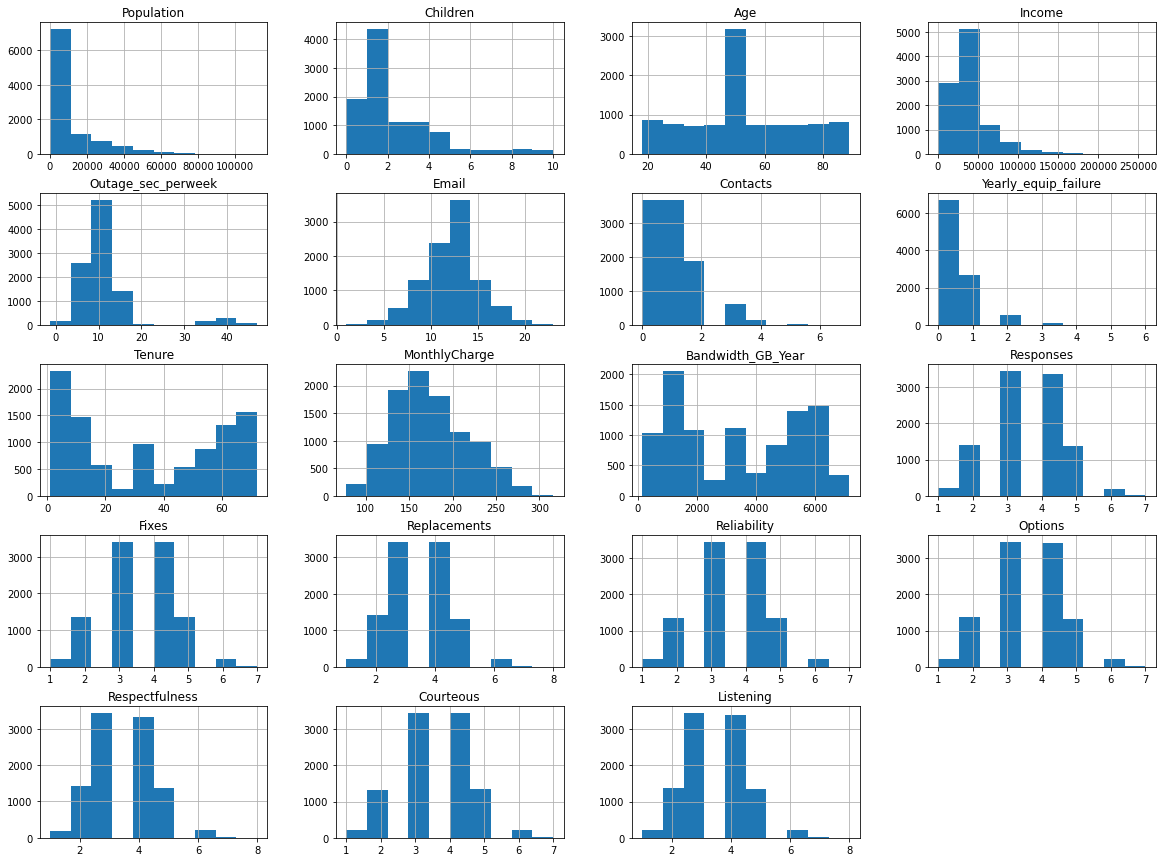

In [26]:
clean_df3.hist(figsize=(20, 15))
plt.show()

<AxesSubplot:>

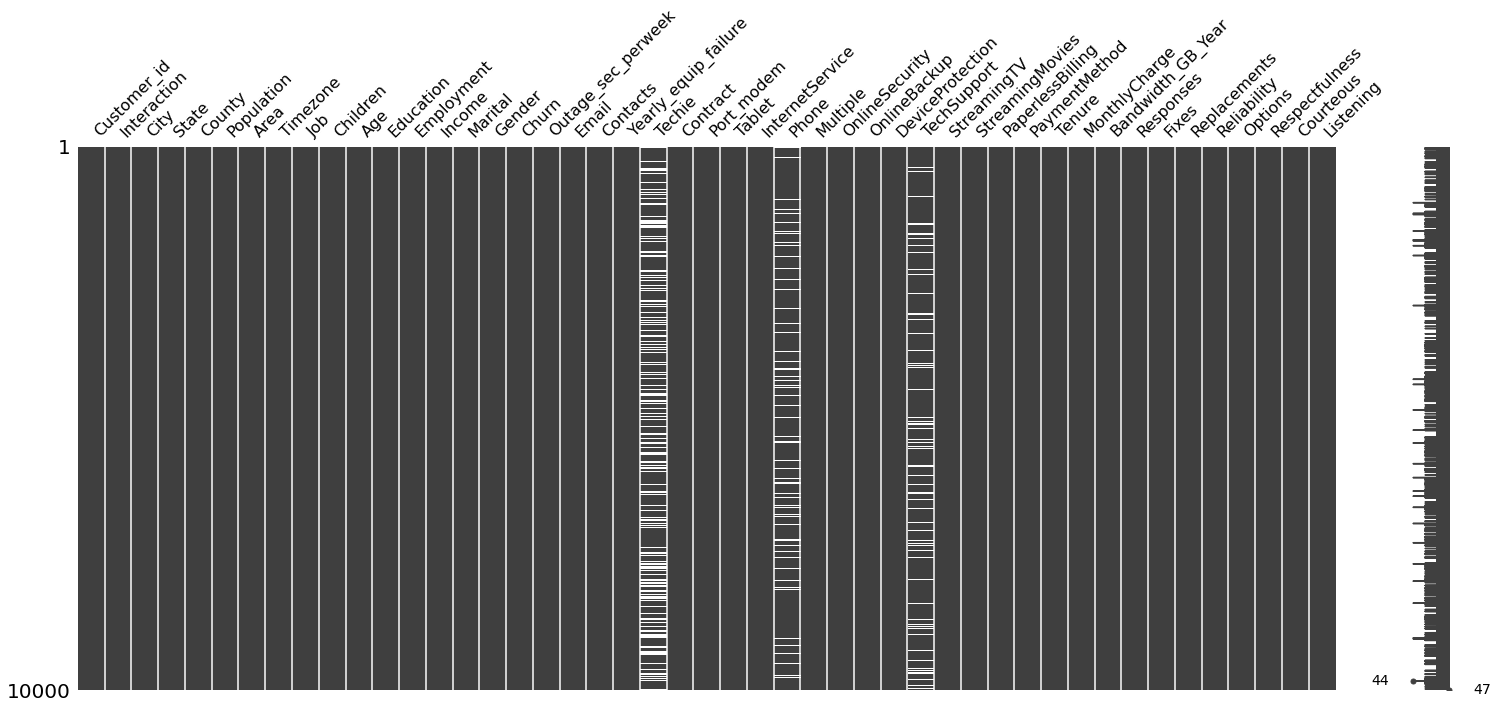

In [27]:
msno.matrix(clean_df3)

In [28]:
clean_df3.isnull().sum()

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

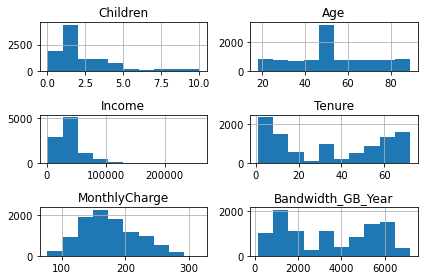

In [39]:
clean_df3[['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.savefig('churn_plot.jpg')
plt.tight_layout()

<AxesSubplot:>

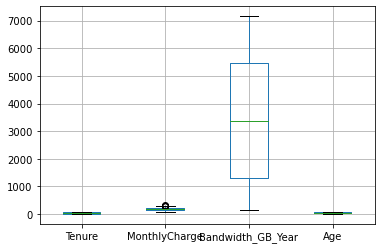

In [41]:
clean_df3.boxplot(['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Age'])

<AxesSubplot:>

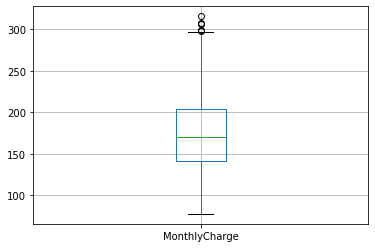

In [30]:
clean_df3.boxplot(['MonthlyCharge'])


<AxesSubplot:>

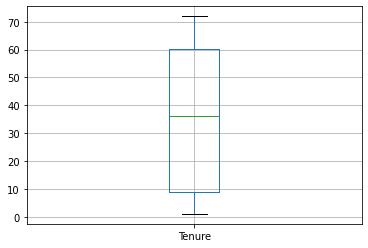

In [35]:
clean_df3.boxplot(['Tenure'])


<AxesSubplot:>

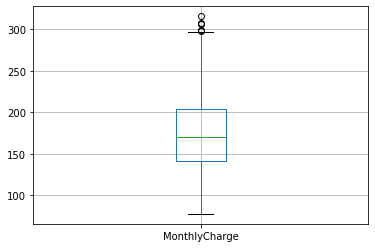

In [36]:
clean_df3.boxplot(['MonthlyCharge'])


<AxesSubplot:>

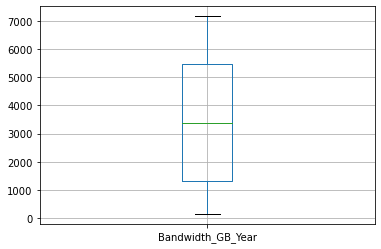

In [37]:
clean_df3.boxplot(['Bandwidth_GB_Year'])

In [34]:
# Outliers

We have to be very careful about outliers. Waterfront houses are very expensive and they are detected as outliers. The real outlier in this data was 33 bedroom house. We have changed it to a 3 bedroom house. The others are real houses but some of them are very expensive because of some properties we don't have information. These expensive houses can have a pool or a special garden.They can be at walking distance to Grade A schools or a walking trail or playground. So we will get rid of %0.1 both from the bottom and from the top.

SyntaxError: invalid syntax (<ipython-input-34-de1439c9970a>, line 3)

In [ ]:
Q1 = df.quantile(0.001)
Q3 = df.quantile(0.999)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

## Export To CSV

In [ ]:
clean_df3.to_csv('churn_clean.csv')

In [ ]:
churn_user = pd.read_csv('churn_clean.csv')

In [ ]:
churn_user.columns

In [ ]:
data = churn_user.drop(columns=['Unnamed: 0', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Population', 'Area', 'Timezone', 'Job', 'Education',
       'Employment','Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure'])
data.head()

## Principal Component Analysis

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
# Import Scikit Learn PCA application
from sklearn.decomposition import PCA

In [ ]:
# Normalize the data
churn_normalized = (data - data.mean()) / data.std()

In [ ]:
pca = PCA(n_components = data.shape[1])

In [ ]:
churn_numeric = data[['Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Responses', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening']]
pcs_names = []
for i, col in enumerate(churn_numeric.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)

In [ ]:
pca.fit(churn_normalized)
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
                        columns = pcs_names)

In [ ]:
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = churn_numeric.columns)

In [ ]:
churn_pca

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# Run the scree plot
plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();



In [ ]:
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

In [ ]:


# Above, we see that 86% of variance is explained by 9 components
# Rotate and reshape the data set. 
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = churn_numeric.columns)
print(rotation)



In [ ]:
# Output loadings for components
loadings = pd.DataFrame(pca.components_.T,
                       columns = pcs_names,
                       index = data.columns)
loadings

In [ ]:
# Finally, extract reduced dataset & print 3 components
churn_reduced = churn_pca.iloc[ : , 0:3]
print(churn_reduced)

# Part III: Data Cleaning

## Data Cleaning Summary

### D1: Findings from Data Cleaning

There was many missing data with meaningful variable fields including Children, Age, Income, Tenure and Bandwidth_GB_Year. Given mean and variance of these variables, it seemed reasonable to impute missing values with median values. Many categorical (such as whether or not the customer was "Techie") & non-numeric (columns for customer ID numbers & related customer transaction IDs) data were not included in analysis given they seemed less meaningful to interpretation and decision-making. The anomalies discovered were not significant & were mitigated as follows.

### D2: Justification of Mitigation Methods: 

Mitigated missing values with imputation using median values. Median was used instead of mean to mitigate the effect of outliers on mean calculation,. Monthly Charge variable shows outliers so left alone. This does not seem significant to this analysis.

### D3: Summary of Outcomes

Cleaned dataset to leave remaining variables describing customer tenure, monthly service charge, yearly bandwidth usage & responses to survey.

### D4 Mitigation Code

See above code, and Panapto Recording. 

### D5 Clean Data

See attached file 'churn_clean.csv'

### D6 Limitations

There are two limitations of the this data.

First, we dont know the logic of how the data was ingested. We do not know the logic of the code that was used to determine categories for each category of the churn feature/column.

Second, we don't have business context about the data within the CSV. We don't know the context of the full table, within the database/datawarehouse. There maybe other columns within the data set that were excluded, which may help with churn prediction. In addition, I am unable to ask business steakholders about the data. Important columns such as age, children, and income have a large number null values, which could be important features in predicting churn or answering business questions. We are unable to ask whether these columns contain null values as result of specific rules or if someone forgot to add the data. In a real world project, you would be able to ask individuals the reasons for this missing data. 


### D7: Affects on Limitations on Business Question/Hypothesis

There are three major effects: 

First, filling the null data points with the median amounts for each column changes predictive and/or prescriptive analysis. 
The sample is skewed, resulting in a possiblily higher chance of overfitting or underfitting on either a linear regression or logistic regression model. This would depend highly on the difference between the mean and the median value. The bias and error for points that were filled by a median value will change drastically, assuming we could consult later with the business. Null values would simply be excluded from a regression model, as they contain no value.

Second, the proportion of nulls. Roughly 25% of the entries for the children, income, and age columns were null. For the Bandwidth_GB_Year or phone numbers, this was about 10%. For any churn analysis related to children, income, and age, wether it is descriptive, diagnostic, prescritive, or predictive, would be highly skewed, since a quarter of the data is missing. It would be very difficult to draw accurate conclusions or built a model where 25% of the data is missing. From a business perspective, it raises the question of how the data is being ingested and the reason for a high number of errors, wether they are human or technology related. A good solution is greater data governance oversight, as well as documentation of use cases to determine when or even if a column should be null.


Third, relates to the mathematical aspect of median. Median is not good for planning. A median cannot tell you about the max, the min, or the total value. However, without business feedback on outliers that we need to remove, we must use median as to fill in the data. Unlike mean, median is not amenable to further mathematical calculation, and therefore, is not used in many statistical tests.This may heavily skew data for statistical tests used by the business to determine trends, predictions, or characteristics of customers. 


<b>Principal Component Analysis</b>

E1. Principal Components: The principal components, and what I determined to be "most important", in this dataset include survey responses to:

    Timely Responses
    Timely Fixes
    Timely Replacements
    Respectful Response

E2. Criteria Used: Intuition about customer service suggests that feedback from user survey might offer the most important components when analyzing churn rate. Also, since survey results were the easiest to select as numeric predictors of whether or not a user would leave the company I included the 8 responses as variables for the PCA. And, of course, users' tenure with the company as well as monthly charge & yearly GB use are seem like significant numeric data points for analysis. I used a scree plot & extracted the eigenvalues for visualization of where the "elbow was bending". The elbow bent at about 3 but kept an eigenvalue above 1 until the tenth component. Then, the fewest number of components were selected based on the 86% explanation at 7 components using the Numpy cumsum method. A rotation & loadings were created which suggested the "most important" features of the dataset.</b>

E3. Benefits: The loadings suggest the variables involved in timely action with regard to customer satisfaction (Responses, Fixes, Replacements & Respectfulness) should be given greater emphasis and hopefully help reduce the churn rate from the large number of 27% & "increase the retention period of customers" by targeting more resources in the direction prompt customer service (Ahmad, 2019, p. 1). Again, this seems an intuitive result but now decision-makers in the company of reasonable verification of what might have been a "hunch".

# Part IV: Supporting Documents

## Part G: Web Sources

“Counting Null as Percentage.” Stack Overflow, stackoverflow.com/questions/41826019/counting-null-as-percentage. Accessed 6 June 2021.

Larose, C. D. & Larose, D. T.   (2019).   Data Science: Using Python and R.   John Wiley & Sons, Inc.

Sharma, Aditya. “Principal Component Analysis (PCA) in Python.” Datacamp, 16 Jan. 2020, www.datacamp.com/community/tutorials/principal-component-analysis-in-python.

## Part H: Text Sources

Walker, Michael. <i>Python Data Cleaning Cookbook: Modern Techniques and Python Tools to Detect and Remove Dirty Data and Extract Key Insights.</i> Packt Publishing, 2020.